# Breast cancer diagnosis: unsupervised vs. supervised algorithms

The objective of this project is to develop classifiers, using unsupervised algorithms, that can accurately predict breast cancer diagnoses based on the provided features. In addition, I also compare the performance of the unsupervised algorithms with the supervised algorithms.


For this project I am using the dataset that has information about breast cancer diagnoses, including patient IDs, Malignant/Benign labels, and 30 features from digitized breast mass images. Created by researchers at the University of Wisconsin-Madison, it can be used for predicting breast cancer prognosis and for tumor classification. The dataset can be found in [The UCI Machine Learning Repository](https://data.world/health/breast-cancer-wisconsin) and was created by Dr. William H Wolberg with contributions from Professor W Nick Street and Olvi L Mangasarian.


--------
Exploratory Data Analysis
-----------

In [164]:
# importing ibraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans, AgglomerativeClustering
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV
import time
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import Normalize
from sklearn.decomposition import PCA

In [165]:
# reading the data
data = pd.read_csv('breast-cancer-wisconsin-data_data.csv')

In [166]:
# some samples from data
data.sample(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
240,88350402,B,13.640,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.037310,...,19.05,94.11,683.4,0.1278,0.12910,0.15330,0.09222,0.2530,0.06510,NaN
230,881972,M,17.050,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.109000,...,24.89,133.50,1189.0,0.1703,0.39340,0.50180,0.25430,0.3109,0.09061,NaN
388,903011,B,11.270,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.027570,...,18.93,79.73,450.0,0.1102,0.28090,0.30210,0.08272,0.2157,0.10430,NaN
427,90745,B,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.014040,...,32.04,83.69,489.5,0.1303,0.16960,0.19270,0.07485,0.2965,0.07662,NaN
393,903516,M,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.156200,...,28.74,172.00,2081.0,0.1502,0.57170,0.70530,0.24220,0.3828,0.10070,NaN
365,901088,M,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.077850,...,26.37,161.20,1780.0,0.1327,0.23760,0.27020,0.17650,0.2609,0.06735,NaN
316,894090,B,12.180,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,...,16.47,81.60,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037,NaN
437,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.029440,...,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,28.14,110.60,897.0,0.1654,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
142,869218,B,11.430,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.018610,...,26.76,82.66,503.0,0.1413,0.17920,0.07708,0.06402,0.2584,0.08096,NaN


In [167]:
# number of rows and columns in dataset
data.shape

(569, 33)

There are 569 samples, each with 30 parameters (features), plus the id and diagnosis column (and one unnamed column with only nan values that will be removed later)

Meaning of column names from https://data.world/health/breast-cancer-wisconsin: 

10 real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the 3 largest values) of these features were computed for each image, resulting in 30 features.  For instance, column #3 is Mean Radius, column #13 is Radius SE and column #23 is Worst Radius.

In the column diagnosis B means Benign (tumor doesn’t contain cancerous cells) and M means Malignant (tumor contains cancerous cells).

### Data Cleaning

removing the column id and the last column "Unnamed: 32" from the datset

In [168]:
data = data.drop(columns=['id', 'Unnamed: 32'])

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

There are no null data in the dataset and all values are float64 except the labels (diagnosis).

diagnosis
B    62.7
M    37.3
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x7f150e5511e0>,
 [Text(-0.42865488965309717, 1.0130424401655103, 'Benign'),
  Text(0.42865498450097356, -1.0130424000319387, 'Malgnant')])

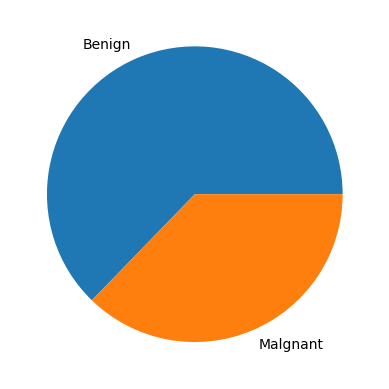

In [170]:
# percentage of Benign and Malignant
print(round(data['diagnosis'].value_counts(normalize=True) * 100, 1))

# visualizing the percentage of each class
labels = 'Benign', 'Malgnant'
sizes = data['diagnosis'].value_counts(normalize=True) * 100

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)


The chart above shows that the dataset is not balanced: 62.7% of data are for benign cases and 37.3% of data are for malgniant cases

#### Correlations between different parameters

In [171]:
# datframe without the label column
data_param = data.loc[:, data.columns != 'diagnosis']

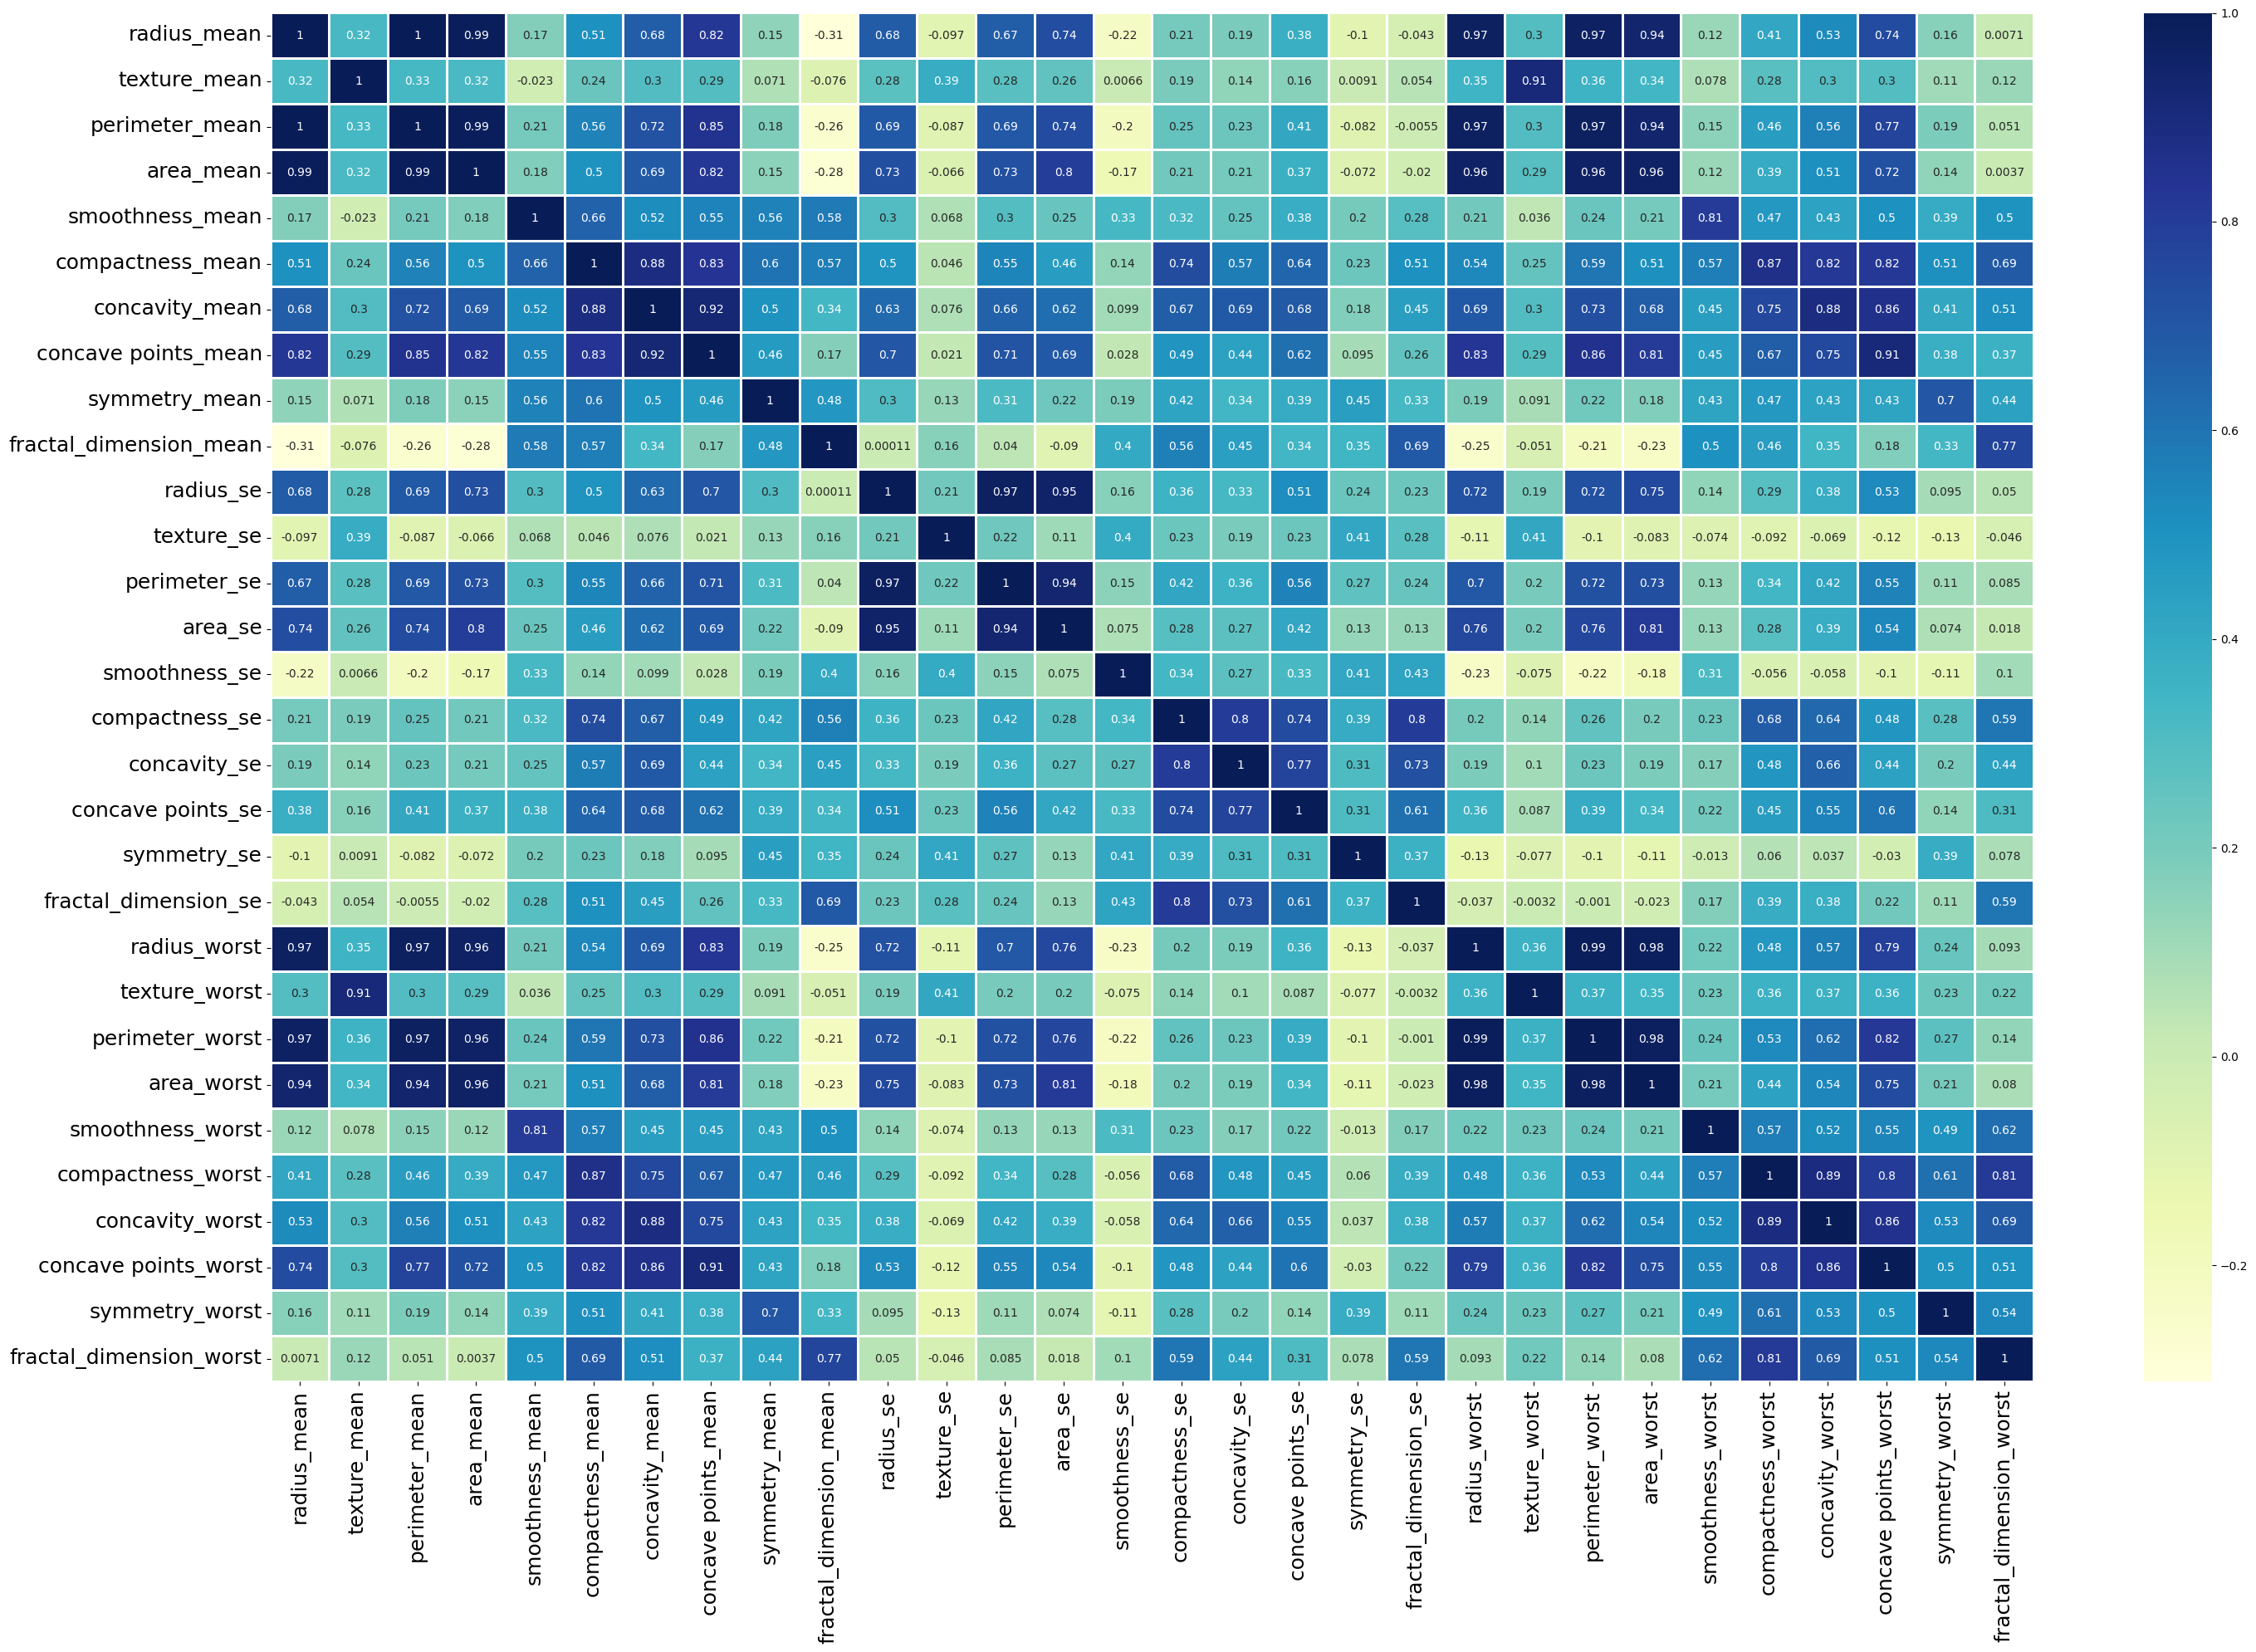

In [172]:
plt.figure(figsize = (30,20))
sns.heatmap(data_param.corr(), annot = True, linewidths = 1, cmap = "YlGnBu")
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.tight_layout()
plt.show()

In [173]:
# find pair of columns with correlation above 0.85
s = data_param.corr().unstack()
s[(s>0.85) & (s <1)]

radius_mean           perimeter_mean          0.997855
                      area_mean               0.987357
                      radius_worst            0.969539
                      perimeter_worst         0.965137
                      area_worst              0.941082
texture_mean          texture_worst           0.912045
perimeter_mean        radius_mean             0.997855
                      area_mean               0.986507
                      concave points_mean     0.850977
                      radius_worst            0.969476
                      perimeter_worst         0.970387
                      area_worst              0.941550
area_mean             radius_mean             0.987357
                      perimeter_mean          0.986507
                      radius_worst            0.962746
                      perimeter_worst         0.959120
                      area_worst              0.959213
compactness_mean      concavity_mean          0.883121
          

Based on the above results I remove the follwoing columns that are highly correlated with other columns:

- perimeter_mean
- area_mean
- radius_worst
- perimeter_worst
- area_worst
- texture_worst
- concavity_mean
- compactness_worst
- concave points_worst
- perimeter_se
- area_se

In [174]:
cor_cols = ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'concavity_mean',
            'compactness_worst',  'concave points_worst', 'perimeter_se', 'area_se']
data_clean = data.drop(columns=cor_cols)

Plotting one more time the correlation matrix to check that there are no highly correlated columns anymore

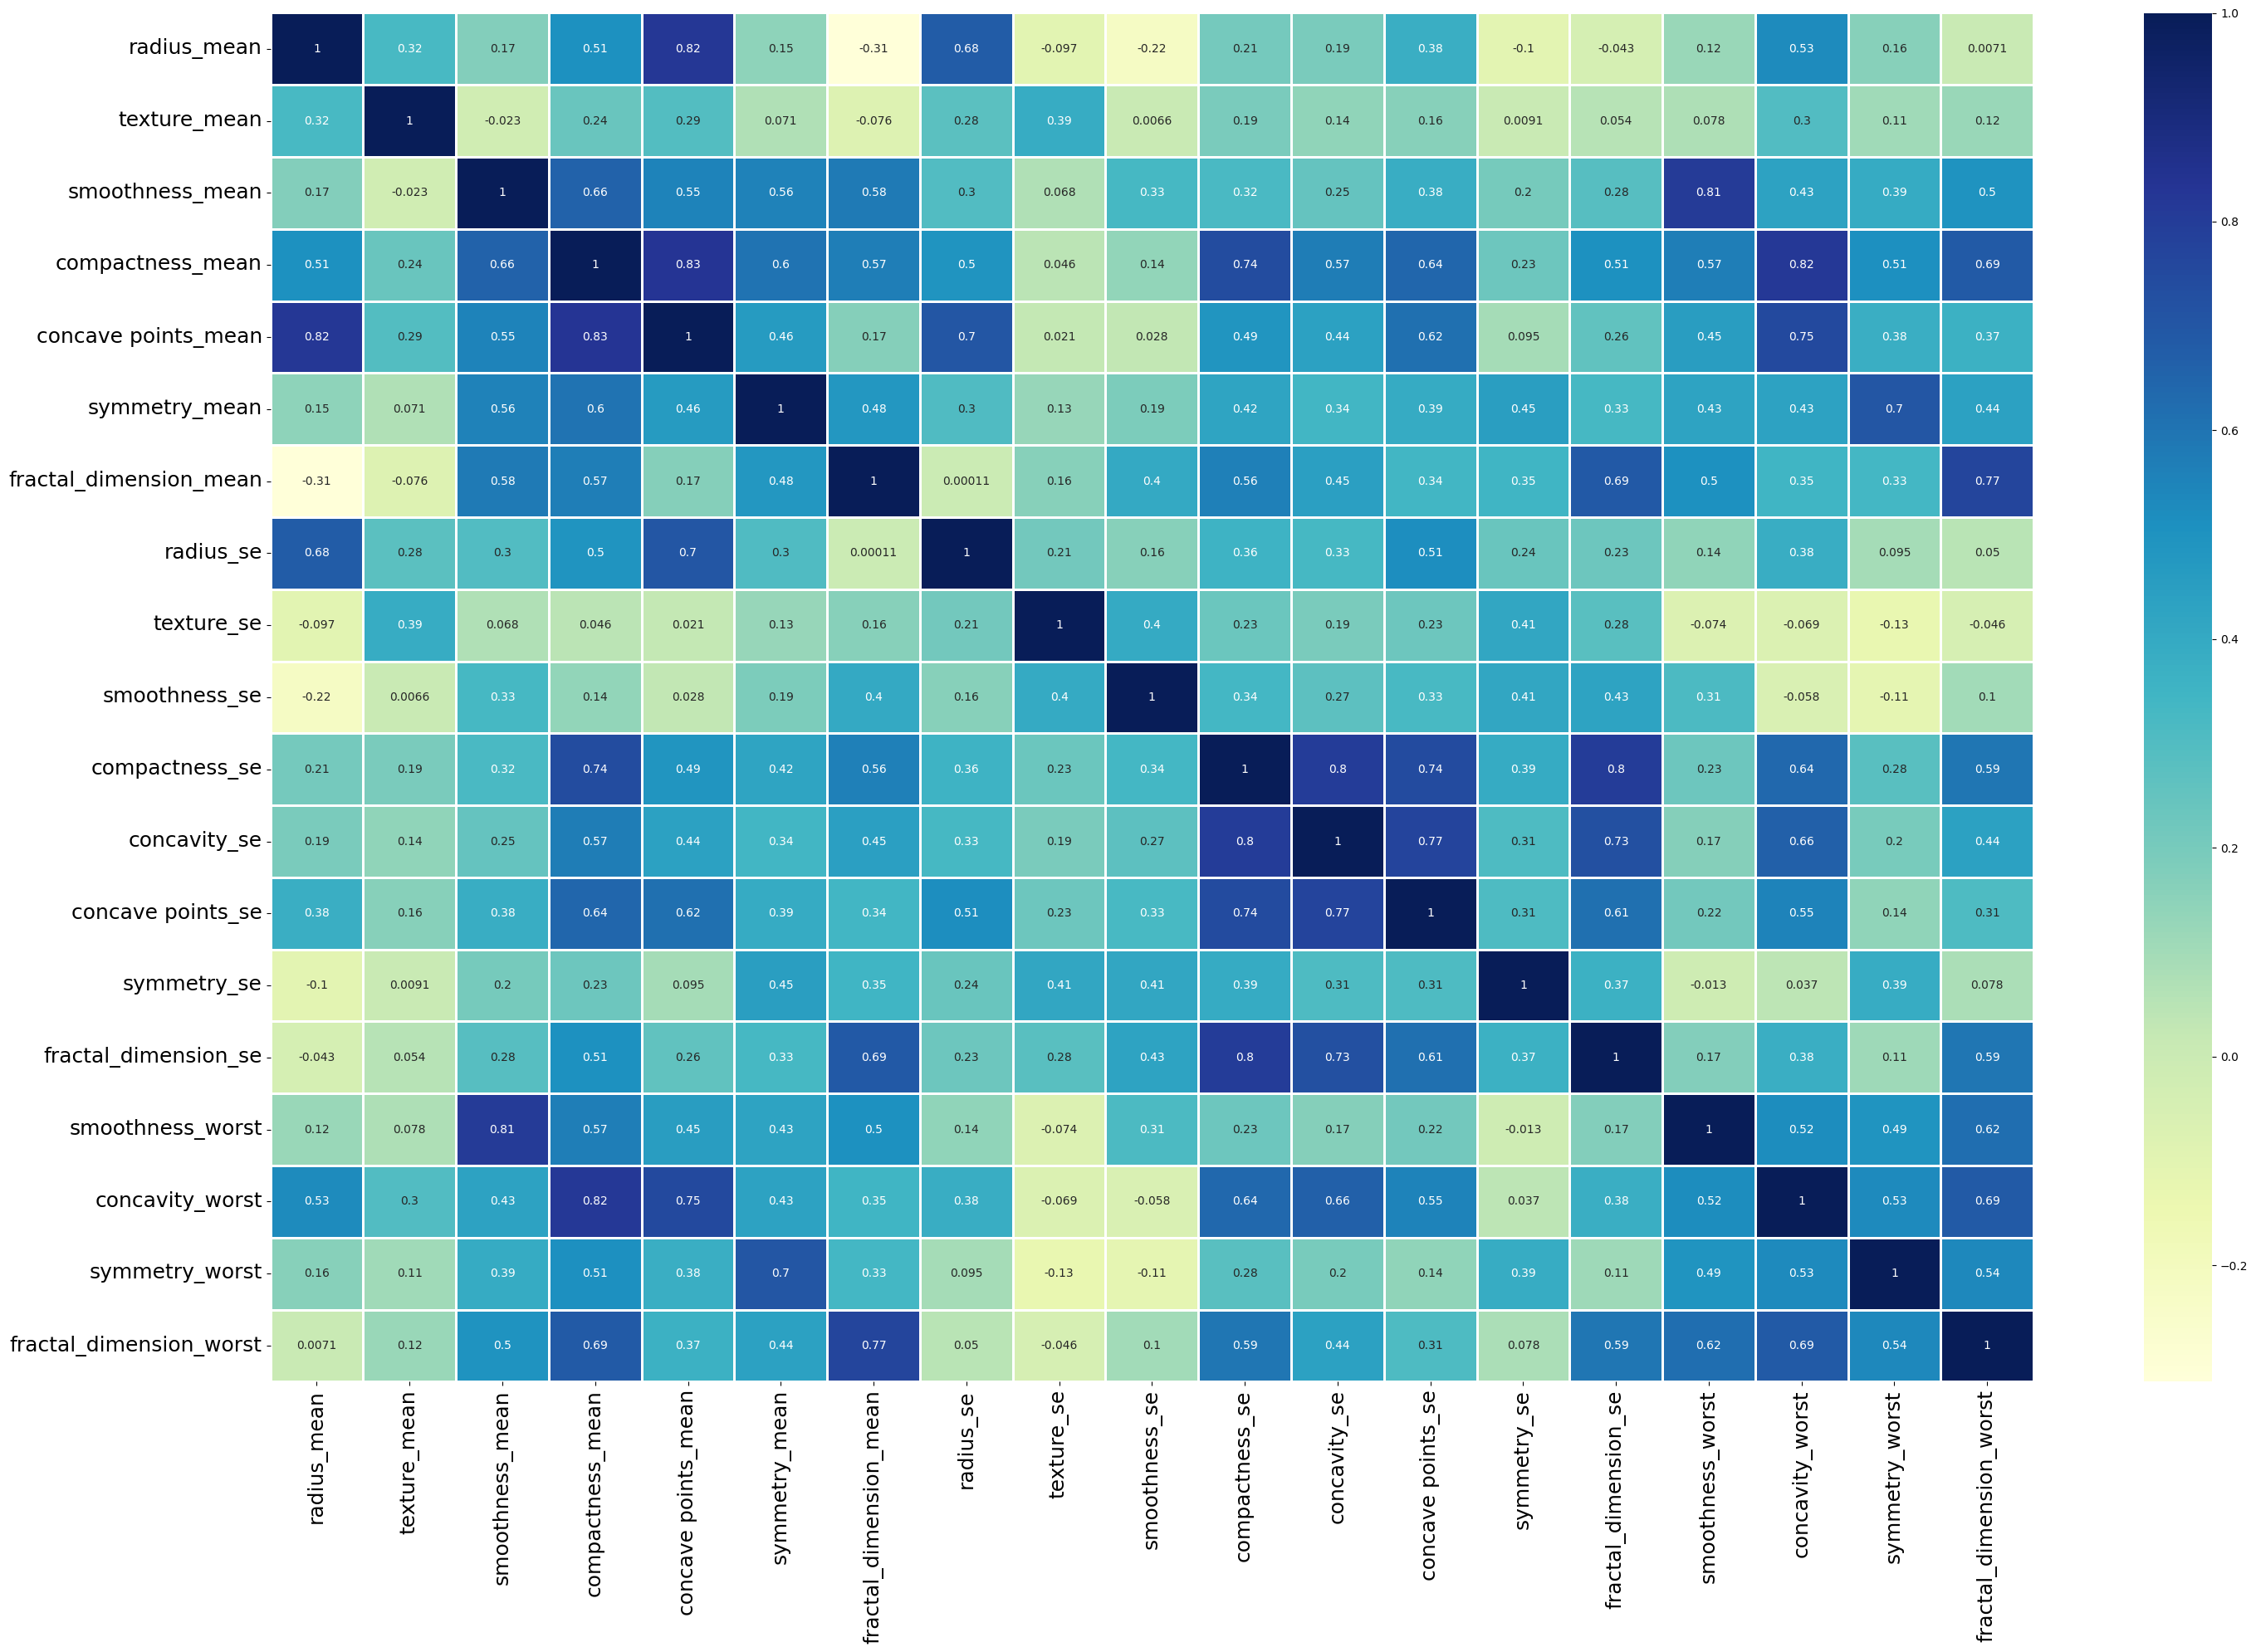

In [175]:
data_param_clean = data_clean.loc[:, data_clean.columns != 'diagnosis']

plt.figure(figsize = (30,20))
sns.heatmap(data_param_clean.corr(), annot = True, linewidths = 1, cmap = "YlGnBu")
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.tight_layout()
plt.show()

In [176]:
# check if there are still highly correlated (>0.85) columns in the datset
# find correlation above 0.85
s = data_param_clean.corr().unstack()
s[(s>0.85) & (s <1)]

Series([], dtype: float64)

All columns that were highly correlated to other columns are removed

In [177]:
data_clean.shape

(569, 20)

Clean dataset has 20 features

#### Comparison of features between two classes

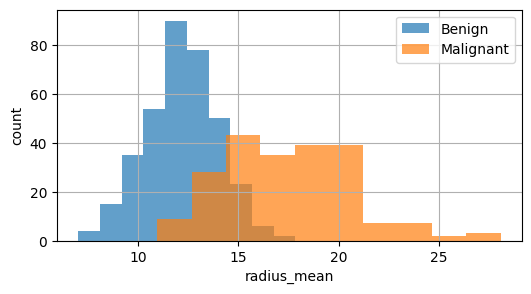

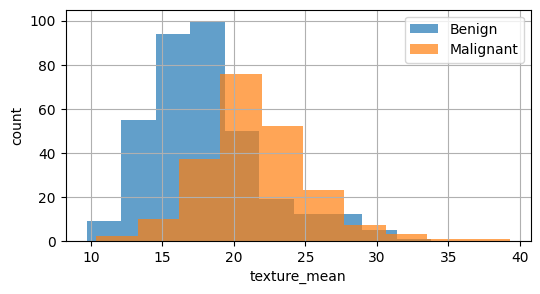

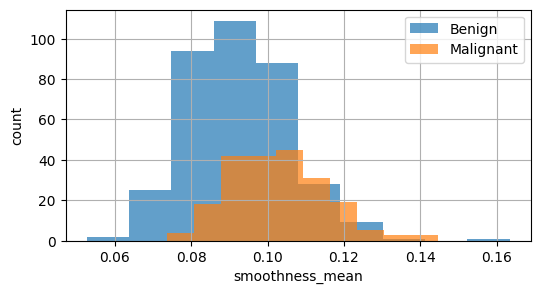

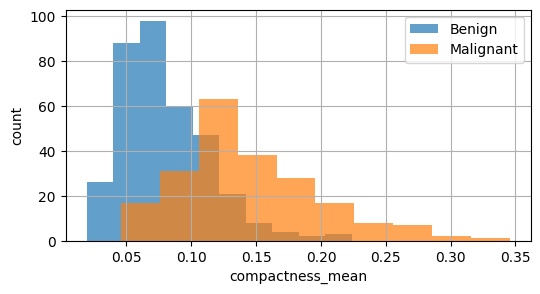

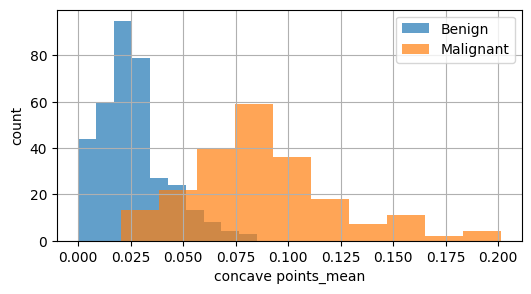

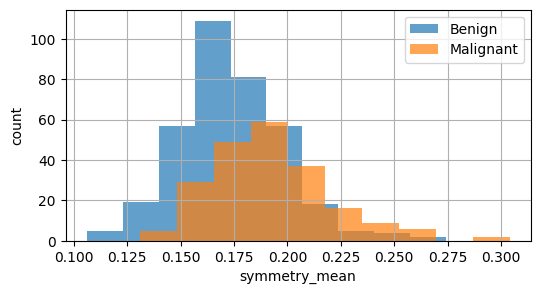

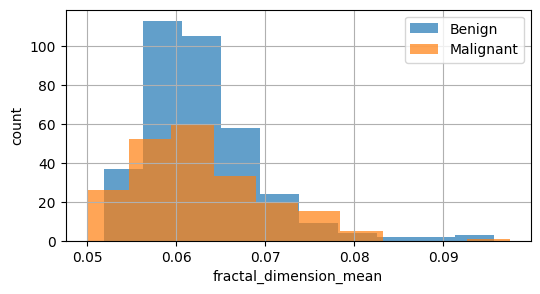

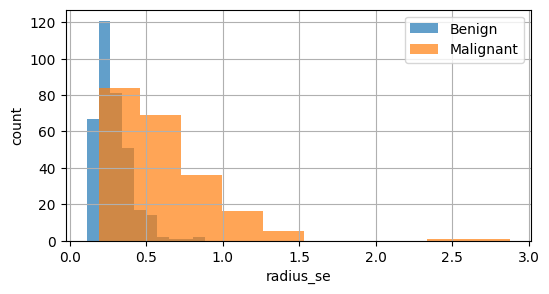

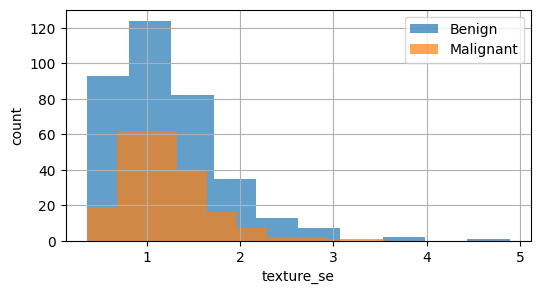

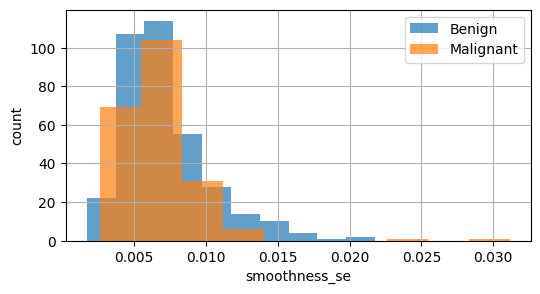

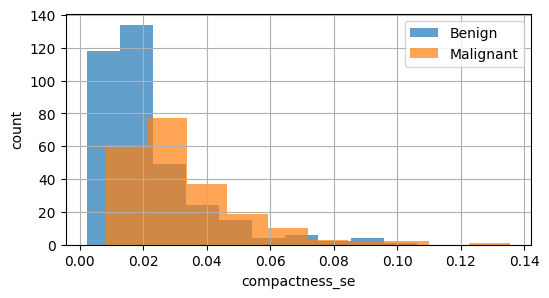

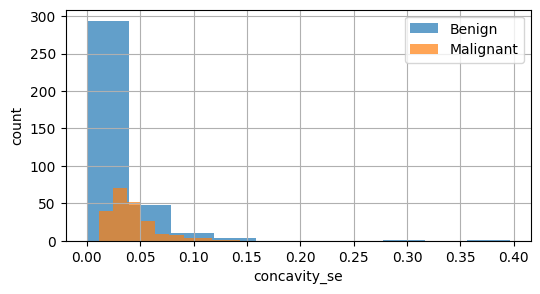

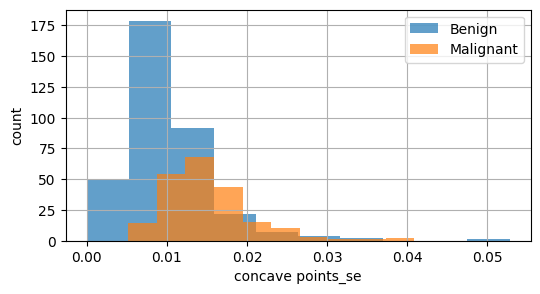

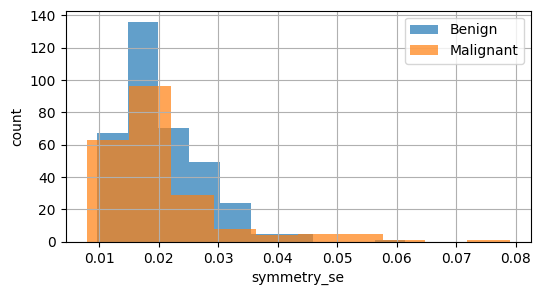

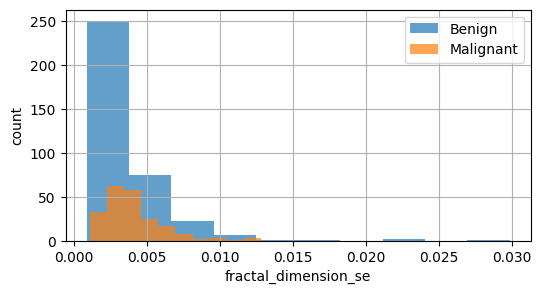

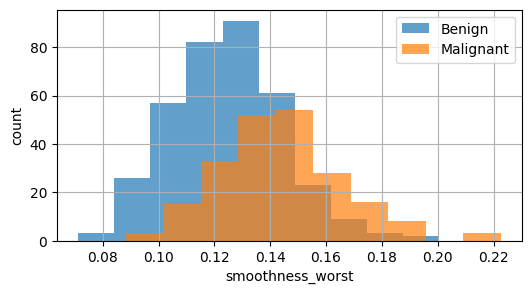

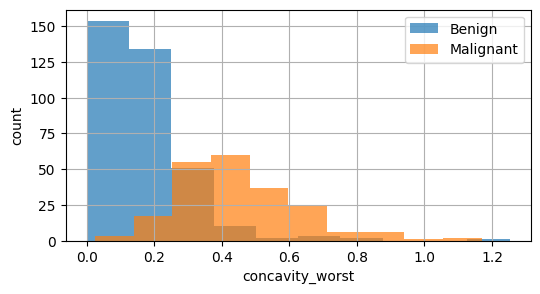

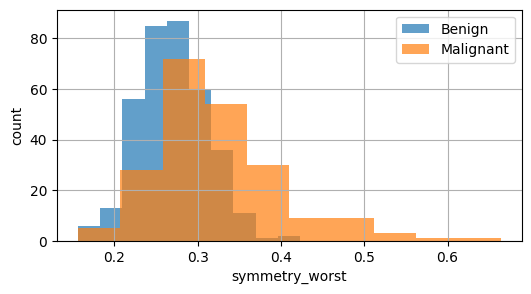

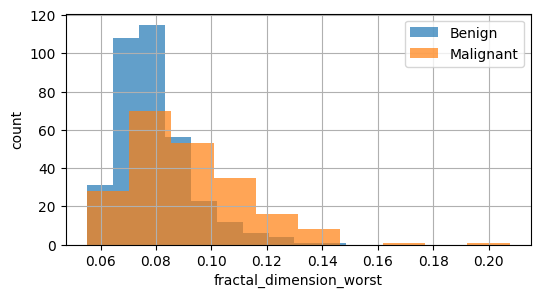

In [178]:
# plotting the histogram of for each parameter in the datset for each of the labels
%matplotlib inline

for i in data_clean.iloc[:,1:].columns:
    
    plt.figure(figsize = (6,3))
    data[data['diagnosis']=='B'][i].hist( label='Benign', alpha=0.7)
    data[data['diagnosis']=='M'][i].hist(label='Malignant', alpha=0.7)
    plt.legend(loc="upper right")
    #plt.title("Comparison of number of words between spam and ham")
    plt.ylabel('count')
    plt.xlabel(i)
    plt.show()

Based on the histograms above it seems that the follwoing parameters could be good indicators to classify benign vs malignant cases (since there is less overlap between the 2 classes):
- radius_mean
- concave points_mean
- radius_se
- concavity_worst


#### Data transformation and final datset

Checking the range of each parameters

In [179]:
data_param_clean.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.048919,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,0.132369,0.272188,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.038803,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,0.022832,0.208624,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,0.071170,0.000000,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.020310,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,0.116600,0.114500,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.033500,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,0.131300,0.226700,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.074000,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,0.146000,0.382900,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.201200,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,0.222600,1.252000,0.663800,0.207500


Above we can see the range of each parameter in the dataset. Since the ranges are very different for each parameter and since we are going to use som emodela, e.g., the Kmeans clustering algorithm,  that require normalized date, we need to normalize the dataset:

In [180]:
data_param_clean = data_param_clean.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

Check one more time the range of each feature after normalization

In [181]:
data_param_clean.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.311195e-16,6.243785e-17,-8.366672e-16,1.998011e-16,-4.995028e-17,1.748260e-16,4.838933e-16,2.497514e-16,-1.123881e-16,-1.545337e-16,1.873136e-16,1.685822e-16,2.497514e-17,9.365678e-17,-6.243785e-18,-2.122887e-16,8.741299e-17,2.622390e-16,-5.744282e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-3.109349e+00,-1.608721e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,-1.058992e+00,-1.552898e+00,-1.774504e+00,-1.296957e+00,-1.056571e+00,-1.911765e+00,-1.531542e+00,-1.096004e+00,-2.680337e+00,-1.304683e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-7.103378e-01,-7.464292e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,-6.230224e-01,-6.941984e-01,-6.234697e-01,-6.923171e-01,-5.566714e-01,-6.738971e-01,-6.511078e-01,-5.846041e-01,-6.906227e-01,-7.558491e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-3.486040e-02,-2.217454e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,-2.919882e-01,-1.973239e-01,-2.201415e-01,-2.807733e-01,-1.988904e-01,-1.403723e-01,-2.192375e-01,-2.297383e-01,-4.680159e-02,-2.180402e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,6.356397e-01,4.934227e-01,6.463664e-01,5.303125e-01,4.705693e-01,2.658657e-01,4.661422e-01,3.680315e-01,3.893116e-01,3.364561e-01,4.722412e-01,3.553798e-01,2.883884e-01,5.970195e-01,5.306742e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,4.766717e+00,4.564409e+00,3.924477e+00,4.480808e+00,4.906602e+00,8.899079e+00,6.649429e+00,8.022940e+00,6.138081e+00,1.206207e+01,6.643755e+00,7.065700e+00,9.842932e+00,3.951897e+00,4.696536e+00,6.040726e+00,6.840837e+00


-----------------
Unsupervised algorithms: Kmeans clustering
---------------------

a function to find best matching label ordering for unsupervised algorithms based on the accuracy

In [182]:
def label_permute_compare(ytdf,yp,n=2):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (1, 0), 0.74 
    """
# your code here
    label_string = np.unique(ytdf['diagnosis']).tolist()

    acc_max = 0
    labelorder=[]

    for i in list(itertools.permutations([0, 1])):
        label_int = {label: idx for idx, label in zip(i,label_string)}
        ytdf_copy = ytdf.copy()
        ytdf_copy['diagnosis'] = ytdf_copy['diagnosis'].map(label_int)
        acc = accuracy_score(ytdf_copy['diagnosis'], yp)
        
        if acc > acc_max:
            acc_max = acc
            labelorder = i
            
    return labelorder, acc_max

### Basic model

Basic Kmeans model: measure accuracy and the process time

In [183]:
start = time.process_time()
model = KMeans(n_clusters=2, random_state=0, n_init=10, init='k-means++', algorithm='lloyd').fit(data_param_clean)
labelorder, acc = label_permute_compare(data_clean, model.labels_)
print('Process time (n_init=10): ', round(time.process_time() - start, 3), 's')
print('label order: ', labelorder, '\naccuracy: ', round(acc,3))

Process time (n_init=10):  0.502 s
label order:  (0, 1) 
accuracy:  0.819


Accuracy of the basic Kmeans model is 0.819

Assigning the correct label to each cluster

In [184]:
# assign the correct label number to the outcome of the model:
label_ordered = {label: idx for idx, label in zip([0,1], labelorder)}
model_labels_ordered = np.vectorize(label_ordered.get)(model.labels_)

# define true response
y_true = data_clean.copy()

# assign the correct label name to the outcome of the model:
label_string = np.unique(y_true['diagnosis']).tolist()
label_int = {label: idx for idx, label in zip([0,1],label_string)}

y_true['diagnosis'] = data_clean['diagnosis'].map(label_int)


Plot the confusion matrix for the basic model

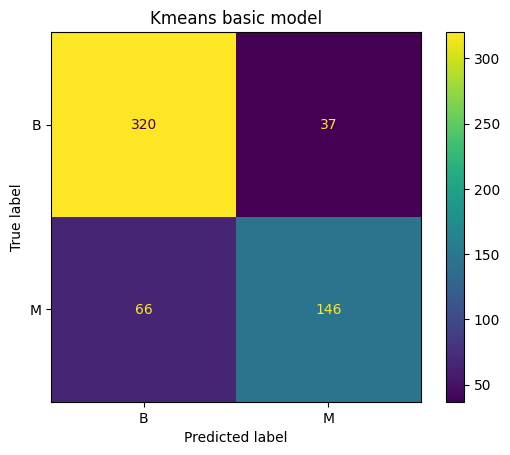

In [185]:
cm = confusion_matrix(y_true['diagnosis'], model_labels_ordered)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_string)
disp.plot(values_format = '')
disp.ax_.set_title('Kmeans basic model')
plt.show()

Confusion matrix bove shows that there are more false clustering for malignant cases

### Hyperparameter tuning

Performing hyperparameter tuning on initialization and algorithm parameters

Process time (n_init=10):  0.404 s
initialization:  k-means++  algorithm:  lloyd  label order:  (0, 1)  accuracy:  0.819 



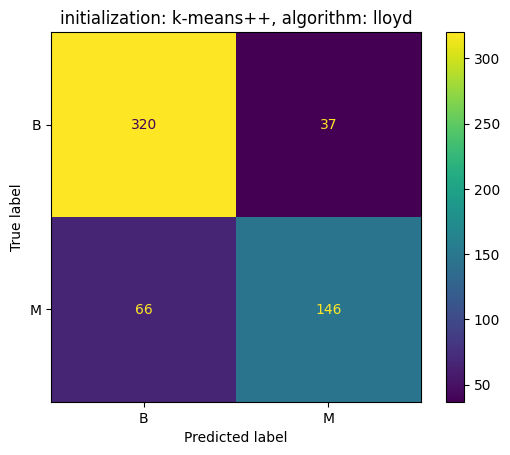

Process time (n_init=10):  0.266 s
initialization:  k-means++  algorithm:  elkan  label order:  (0, 1)  accuracy:  0.819 



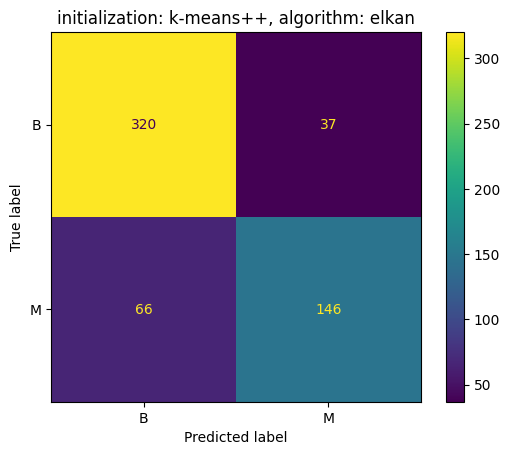

Process time (n_init=10):  0.039 s
initialization:  random  algorithm:  lloyd  label order:  (1, 0)  accuracy:  0.815 



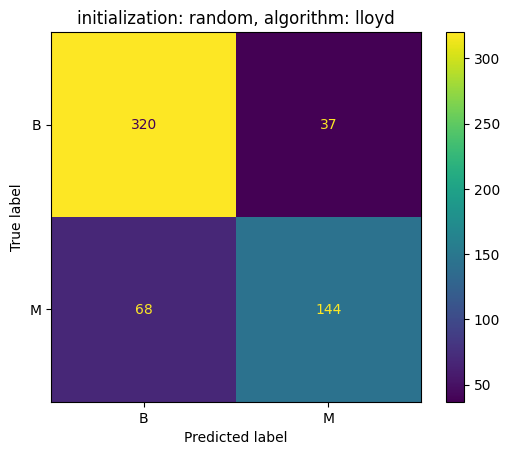

Process time (n_init=10):  0.074 s
initialization:  random  algorithm:  elkan  label order:  (1, 0)  accuracy:  0.815 



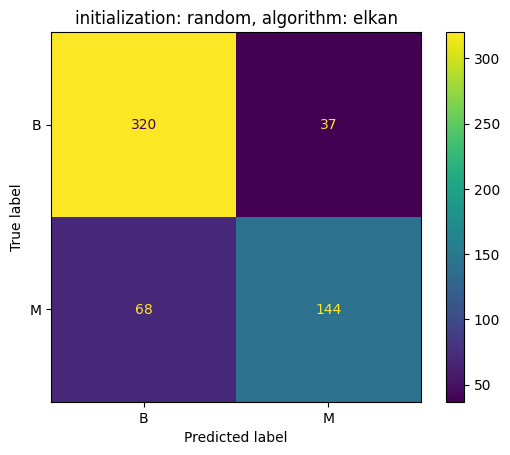

In [214]:
initialization = ['k-means++', 'random']
algorithm = ['lloyd', 'elkan']

for init in initialization: 
    for alg in algorithm:
        start = time.process_time()
        model = KMeans(n_clusters=2, random_state=0, n_init=10, init=init, algorithm=alg).fit(data_param_clean)
        labelorder, acc = label_permute_compare(data_clean, model.labels_)
        print('Process time (n_init=10): ', round(time.process_time() - start, 3), 's')
        print("initialization: ", init, " algorithm: ", alg, ' label order: ', labelorder, ' accuracy: ', round(acc,3), '\n')
        label_ordered = {label: idx for idx, label in zip([0,1], labelorder)}
        model_labels_ordered = np.vectorize(label_ordered.get)(model.labels_)

        y_true = data_clean.copy()
        label_string = np.unique(y_true['diagnosis']).tolist()
        label_int = {label: idx for idx, label in zip([0,1],label_string)}

        y_true['diagnosis'] = data_clean['diagnosis'].map(label_int)

        cm = confusion_matrix(y_true['diagnosis'], model_labels_ordered)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_string)
        disp.plot(values_format = '')
        disp.ax_.set_title('initialization: {0}, algorithm: {1}'.format(init, alg))
        plt.show()

The result of the hyperparameter tuning shows that the best model is the one with kmean++ initialization and Iloyd or elkan algorithm, with the accuracy of 0.819 (same as basic model)

### Dimensionality reduction using PCA

Using PCA to reduce the number of dimanisons and re-run the Kmeans algorithm:

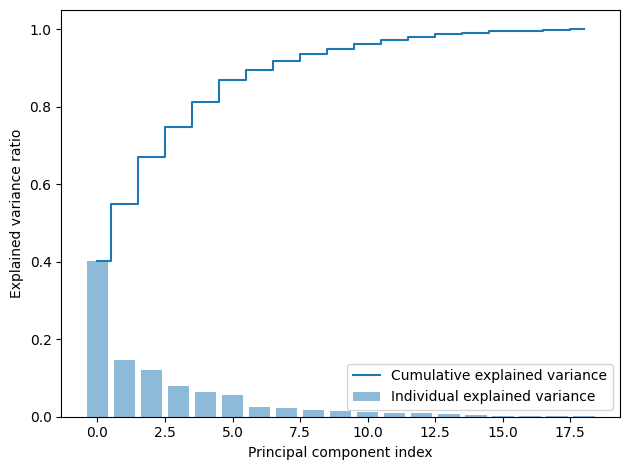

In [187]:
pca = PCA()
pca.fit(data_param_clean)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; 
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

targeting about 95% cumulative explained variance results in 10 components in PCA:

In [188]:
pca = PCA(n_components=10)
pca.fit(data_param_clean)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
print("cumulative explained variance: ", round(cum_sum_eigenvalues[-1],3))

cumulative explained variance:  0.95


Transform the data and check the number of features (should be 10)

In [189]:
data_clean_PCA = pca.transform(data_param_clean)
data_clean_PCA.shape

(569, 10)

In [190]:
start = time.process_time()
model_pca = KMeans(n_clusters=2, random_state=0, n_init=10, init='k-means++', algorithm='lloyd').fit(data_clean_PCA)
labelorder, acc = label_permute_compare(data_clean, model_pca.labels_)
print('Process time (n_init=10): ', round(time.process_time() - start, 3), 's')
print('label order: ', labelorder, '\naccuracy: ', round(acc,3))

Process time (n_init=10):  0.03 s
label order:  (0, 1) 
accuracy:  0.819


From the esults one can see that that the accuracy of the model using 10 principle features with PCA is the same as the one with the complete 20 features, however the process time is drastically reduced.

-----------------
Unsupervised algorithms: hierarchical clustering
---------------------

### Basic model

Basic hierarchical model: measure accuracy and the process time

In [191]:
start = time.process_time()
model = AgglomerativeClustering(linkage='complete', n_clusters=2).fit(data_param_clean)
labelorder, acc = label_permute_compare(data_clean, model.labels_)
print('Process time: ', round(time.process_time() - start, 3), 's')
print('label order: ', labelorder, '\naccuracy: ', round(acc,3))

Process time:  0.018 s
label order:  (0, 1) 
accuracy:  0.624


Accuracy of the basic Kmeans model is 0.624

Assigning the correct label to each cluster

In [192]:
# assign the correct label number to the outcome of the model:
label_ordered = {label: idx for idx, label in zip([0,1], labelorder)}
model_labels_ordered = np.vectorize(label_ordered.get)(model.labels_)

# assign the correct label name to the outcome of the model:
label_int = {label: idx for idx, label in zip([0,1],label_string)}

y_true['diagnosis'] = data_clean['diagnosis'].map(label_int)


Plot the confusion matrix for the basic model

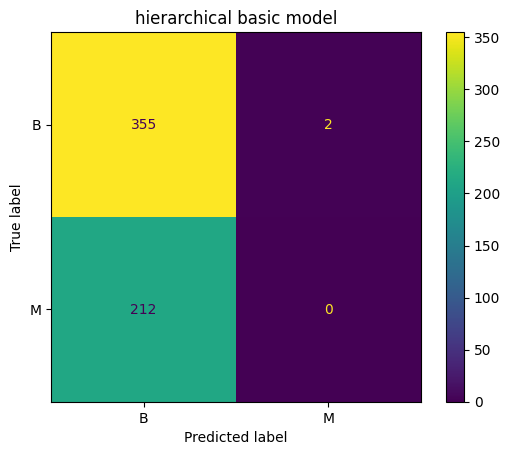

In [193]:
cm = confusion_matrix(y_true['diagnosis'], model_labels_ordered)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_string)
disp.plot(values_format = '')
disp.ax_.set_title('hierarchical basic model')
plt.show()

Based on the accuracy and the confusion matrix, one can see that the basic model hs a lot of false classification (specially for Malignant cases)

### Hyperparameter tuning

Performing hyperparameter tuning on linkage and distance metic parameters

Process time:  0.023 s
linkage:  ward  distance metric:  euclidean  label order:  (1, 0)  accuracy:  0.891 



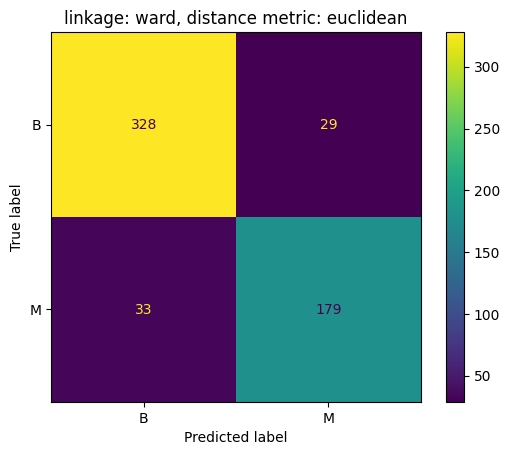

Process time:  0.015 s
linkage:  complete  distance metric:  euclidean  label order:  (0, 1)  accuracy:  0.624 



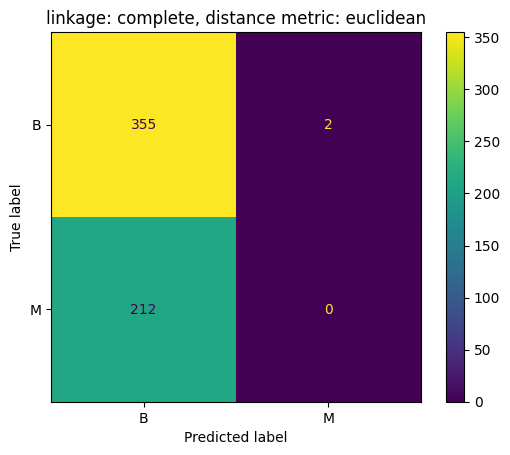

Process time:  0.012 s
linkage:  complete  distance metric:  l1  label order:  (0, 1)  accuracy:  0.645 



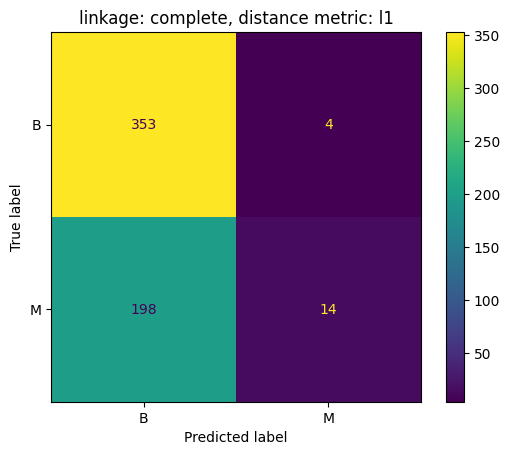

Process time:  0.015 s
linkage:  complete  distance metric:  l2  label order:  (0, 1)  accuracy:  0.624 



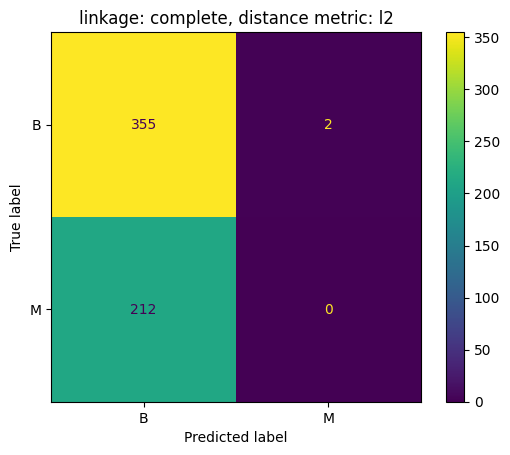

Process time:  0.012 s
linkage:  complete  distance metric:  manhattan  label order:  (0, 1)  accuracy:  0.645 



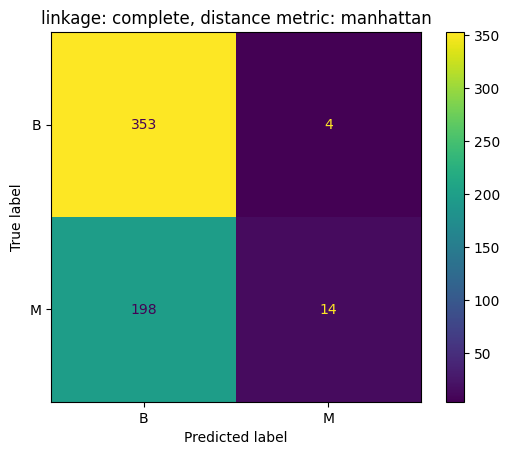

Process time:  0.018 s
linkage:  complete  distance metric:  cosine  label order:  (0, 1)  accuracy:  0.817 



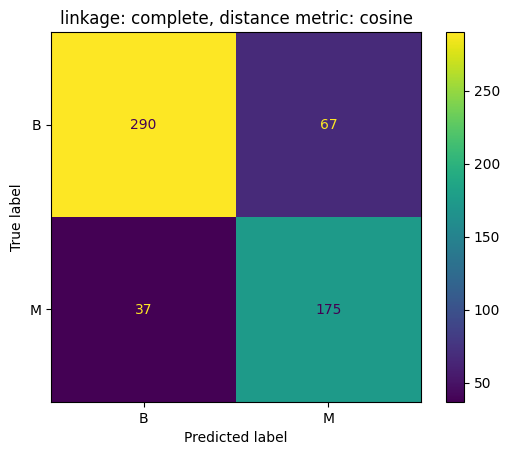

Process time:  0.013 s
linkage:  average  distance metric:  euclidean  label order:  (0, 1)  accuracy:  0.624 



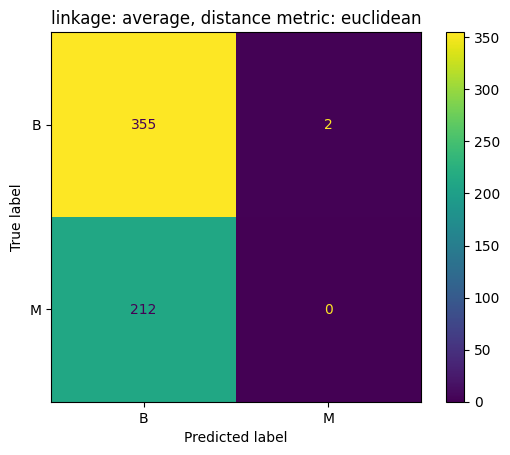

Process time:  0.016 s
linkage:  average  distance metric:  l1  label order:  (1, 0)  accuracy:  0.627 



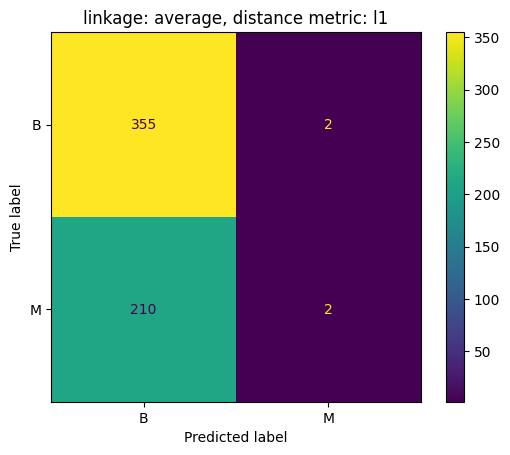

Process time:  0.016 s
linkage:  average  distance metric:  l2  label order:  (0, 1)  accuracy:  0.624 



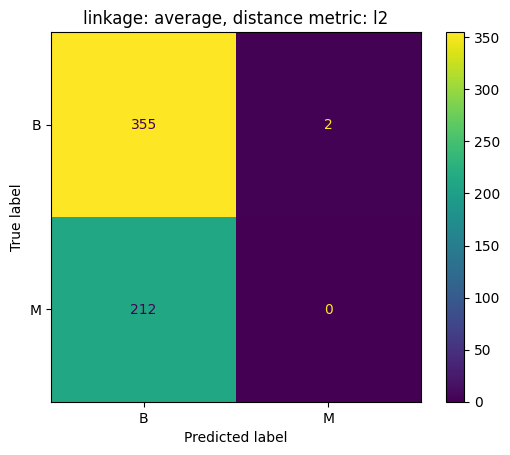

Process time:  0.012 s
linkage:  average  distance metric:  manhattan  label order:  (1, 0)  accuracy:  0.627 



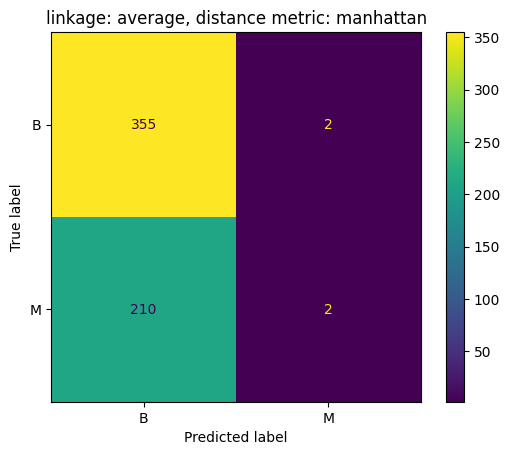

Process time:  0.012 s
linkage:  average  distance metric:  cosine  label order:  (1, 0)  accuracy:  0.856 



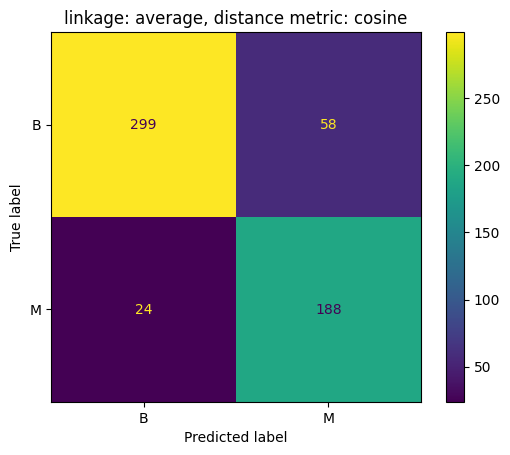

Process time:  0.011 s
linkage:  single  distance metric:  euclidean  label order:  (0, 1)  accuracy:  0.626 



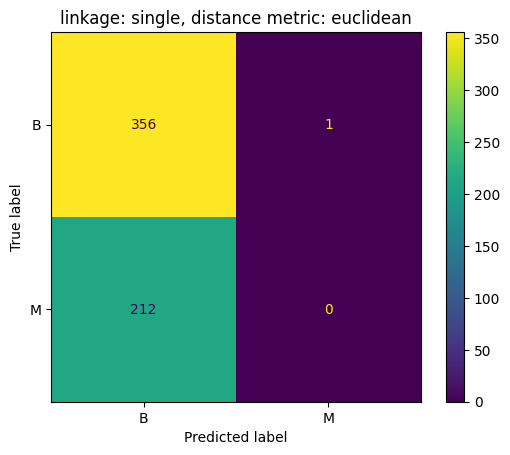

Process time:  0.01 s
linkage:  single  distance metric:  l1  label order:  (0, 1)  accuracy:  0.626 



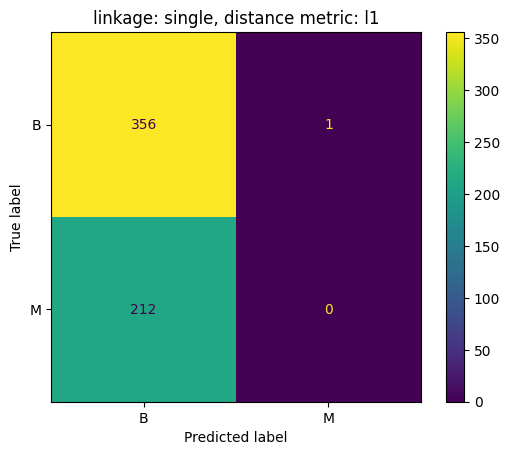

Process time:  0.01 s
linkage:  single  distance metric:  l2  label order:  (0, 1)  accuracy:  0.626 



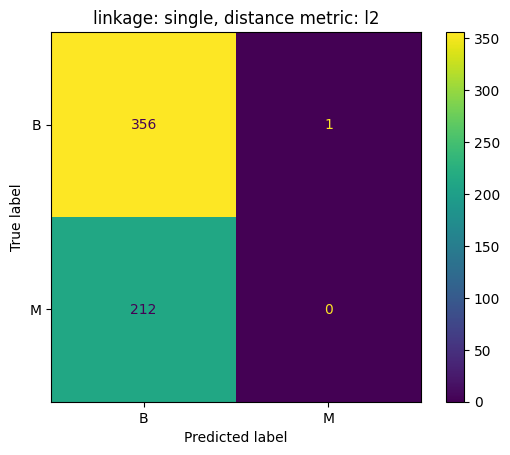

Process time:  0.01 s
linkage:  single  distance metric:  manhattan  label order:  (0, 1)  accuracy:  0.626 



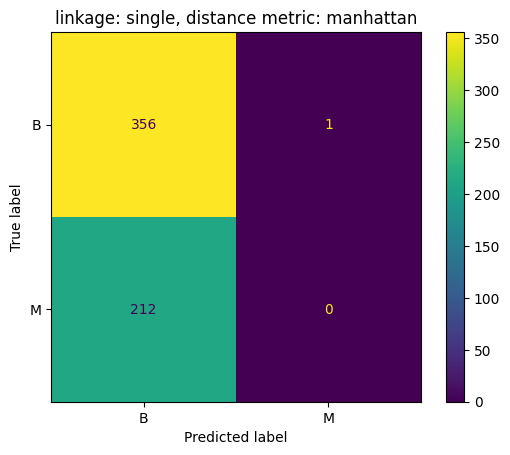

Process time:  0.009 s
linkage:  single  distance metric:  cosine  label order:  (0, 1)  accuracy:  0.626 



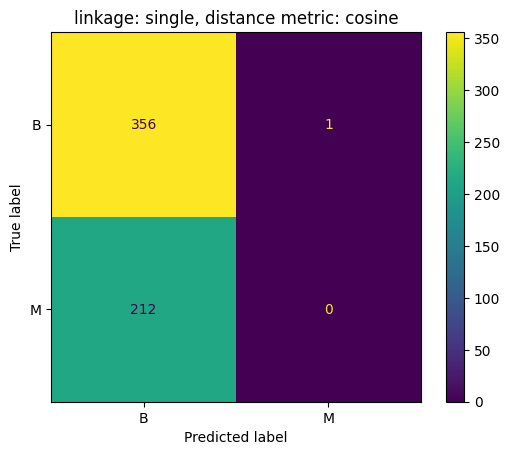

In [194]:
linkage = ['ward', 'complete', 'average', 'single']
distance_metric = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

for link in linkage: 
    for dis in distance_metric:
        if link != 'ward' or dis == 'euclidean':
            start = time.process_time()
            model = AgglomerativeClustering(n_clusters=2, linkage=link, metric=dis).fit(data_param_clean)
            labelorder, acc = label_permute_compare(data_clean, model.labels_)
            print('Process time: ', round(time.process_time() - start, 3), 's')
            print("linkage: ", link, " distance metric: ", dis, ' label order: ', labelorder, ' accuracy: ', round(acc,3), '\n')
            label_ordered = {label: idx for idx, label in zip([0,1], labelorder)}
            model_labels_ordered = np.vectorize(label_ordered.get)(model.labels_)

            y_true = data_clean.copy()
            label_string = np.unique(y_true['diagnosis']).tolist()
            label_int = {label: idx for idx, label in zip([0,1],label_string)}

            y_true['diagnosis'] = data_clean['diagnosis'].map(label_int)

            cm = confusion_matrix(y_true['diagnosis'], model_labels_ordered)

            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_string)
            disp.plot(values_format = '')
            disp.ax_.set_title('linkage: {0}, distance metric: {1}'.format(link, dis))
            plt.show()

The result of the hyperparameter tuning shows that the best model is the one with ward linkage and euclidean distance metric, with the accuracy of 0.891 (much higher than the basic model, and higher than the best Kmeans model)

### Dendrogram of the best model

Below is a function to plot the dendogram of the best hierarchical model

In [195]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

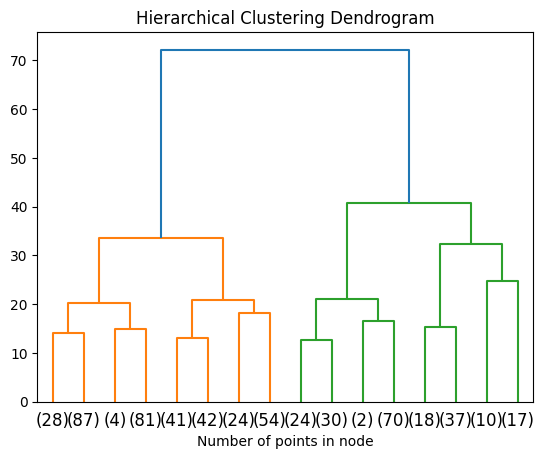

In [196]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(linkage='ward', metric='euclidean', distance_threshold=0, n_clusters=None).fit(data_param_clean)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node")
plt.show()

the above dendogram can be used to find subclasses in each class (benign/malgnant)

### Dimensionality reduction using PCA

Using PCA to reduce the number of dimanisons and re-run the Kmeans algorithm:

In [197]:
start = time.process_time()
model_pca = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=2).fit(data_clean_PCA)
labelorder, acc = label_permute_compare(data_clean, model_pca.labels_)
print('Process time: ', round(time.process_time() - start, 3), 's')
print('label order: ', labelorder, '\naccuracy: ', round(acc,3))

Process time:  0.013 s
label order:  (1, 0) 
accuracy:  0.903


From the results one can see that that using 10 principle features with PCA not only reduces the process time, it slightly increases the accuracy (compared to the complete daaset with 20 features)

-----------
Supervised learning algorithms: Ada Boost Classifier
---------------

The supervised algorithm that I selected  is an ensemble Ada boost classifier (base estimator is decisoiin tree with max depth=1). I first consider the basic algorithm and measure the accuracy (using cross vlaidation) and the process time. 

### Basic model

In [198]:
# decision tree clasifier with default settings
clf_AB = AdaBoostClassifier()

# to measure time needed ot run the model (with cross validation cv=3)
start = time.process_time()

X = data_param_clean
y = data_clean['diagnosis']
# calculating cross validation scaore (cv=3) fro the model
clf_AB_score_cv= cross_val_score(clf_AB, X, y, cv=3)
print('Process time (CV=3): ', round(time.process_time() - start, 3), 's \n')
print('Cross-validation scores: ', clf_AB_score_cv.round(3), '\n')

# calculating average cross validation score (cv=3)
clf_AB_score_cv_avg = np.mean(clf_AB_score_cv)
print('Avergae of cross-validation scores: ', round(clf_AB_score_cv_avg,3))

Process time (CV=3):  0.452 s 

Cross-validation scores:  [0.947 0.963 0.974] 

Avergae of cross-validation scores:  0.961


The reuslts show that the accuracy of the basic model is significanlty higher than the unsupervised models considered in this study

#### Hyperparameter tuning

After, I perform a hyperparameter tuning (using grid search) by performing the optimization on two hyperparameters, namely number of estimators (number of tress) and learning rate.

In [199]:
# performing grid search on number of estimators and learning rate

params = {
    'n_estimators': [50, 100, 150, 200, 250], 
    'learning_rate' : np.logspace(-2, 2, num=5, endpoint=True, base=2.0, dtype=None, axis=0)
}

grid_AB = GridSearchCV(estimator=clf_AB,param_grid=params, cv=3).fit(X, y)

In [200]:
print('Best parameters: ', grid_AB.best_params_)
print('best score: ', round(grid_AB.best_score_,3))

Best parameters:  {'learning_rate': 1.0, 'n_estimators': 200}
best score:  0.979


the results of the hyper prameter tuning show that best model is with 'learning_rate': 1.0, 'n_estimators': 200. the accuracy of the best model is 0.979!

I measure once again the process time, using the "best model": The execution time is further increased compared to the basic model since the number of estimators (trees) has increased.

In [201]:
# measure time needed ot run the best model (with cross validation cv=3)
start = time.process_time()
clf_AB_score_cv= cross_val_score(grid_AB.best_estimator_, X, y, cv=3)
print('Process time (CV=3): ', round(time.process_time() - start, 3), 's \n')

Process time (CV=3):  1.788 s 



Note that the process time is for cross validation (cv=3), therefore, to have a fair comparison with the unsupervised models, this value should be divided by 3. 

Nevertheless, the results how that the process time is significanlty higher than the unsupervised algorithms

#### ROC plot

Below is a function that generates the ROC curves for a k-fold cross validation results and plots the mean ROC curve and caculates the average AUC value (with its standard deviation).

In [202]:
# function to plot ROC curve for all folds of cross validation + the mean values + the aera under curve (AUC) 
def ROC_curve(X, y, classifier, cv, plot_title):
    cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=0)
    # Run classifier with cross-validation and plot ROC curves
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    fig, ax = plt.subplots()
    for i, (train_index, test_index) in enumerate(cv.split(X, y)):
        classifier.fit(X.iloc[train_index], y.iloc[train_index])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X.iloc[test_index],
            y.iloc[test_index],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    
    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic: " + plot_title,
    )
    ax.legend(loc="lower right")
    plt.show()
    return(mean_auc)

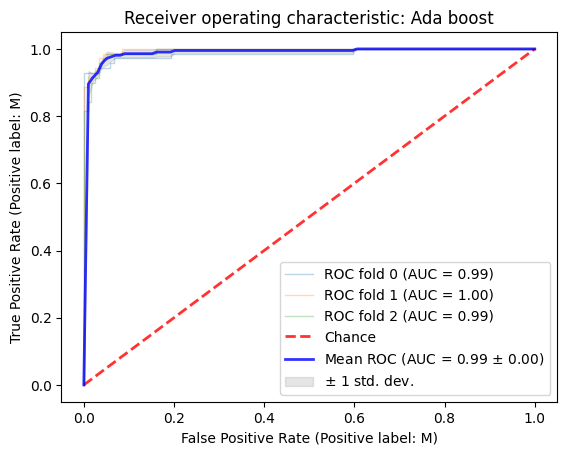

In [203]:
# plot ROC curve (results of cross validaiton) fro the best model
AB_ROC = ROC_curve(X, y, classifier=grid_AB.best_estimator_, cv=3, plot_title="Ada boost")

One can see that for Adaboost, the ROC curve looks very good, i.e., very close to 1 in the top eft corner  (meaning higher TPR for a relatively low FPR) and the avergae AUC value is 0.99.

### Dimensionality reduction using PCA

Using PCA to reduce the number of dimanisons and re-run the best Adboost algorithm:

In [205]:
clf_AB_pca = AdaBoostClassifier(n_estimators=200, learning_rate=1)

# to measure time needed ot run the model (with cross validation cv=3)
start = time.process_time()

X = data_clean_PCA
y = data_clean['diagnosis']

start = time.process_time()
clf_AB_pca_score_cv= cross_val_score(clf_AB_pca, X, y, cv=3)
print('Process time (CV=3): ', round(time.process_time() - start, 3), 's \n')
print('Cross-validation scores: ', clf_AB_pca_score_cv.round(3), '\n')

# calculating average cross validation score (cv=3)
clf_AB_pca_score_cv_avg = np.mean(clf_AB_pca_score_cv)
print('Avergae of cross-validation scores: ', round(clf_AB_pca_score_cv_avg,3))

Process time (CV=3):  1.476 s 

Cross-validation scores:  [0.958 0.926 0.905] 

Avergae of cross-validation scores:  0.93


From the results one can see that that using 10 principle features with PCA significantly reduces 

-------------
Discussion and Conclusion
--------------

Table below is summary of the comparison between 2 unsupervised algorithms (Kmenas and hierarchical clustering) and Adaboost supervised algorithm (including the results after performing PCA with 10 components, i.e., 95% explained variance).

Note that results are from the "best model", i.e., the outcome of the hyperparameter tuning and for Adaboost is based on cross validation with cv=3 (the process time is divided by 3 for comparison with unsupervised models):

|  | Kmeans | Kmeans (PCA) | hierarchical | hierarchical (PCA) | Adaboost | Adaboost (PCA)|
| --- | --- | --- | --- | --- | --- | --- |
| Accuracy:| 0.819 | 0.819 | 0.891 | 0.903 | 0.979 | 0.930 |
| Time:| 0.404 s | 0.03 s | 0.023 s | 0.013 s | 0.596 s | 0.492 s |




Based on these results, one can conclude that, Adaboost supervised model performed significantly better than both unsupervised models. The main reason  might be because of the limited number of samples available which shows the higher data-efficicncy of the supervised models compared to the unsupervised models.

Between the unspervised models, hierarchical had higher accuracy and lower process time compared to the Kmeans model.

Reducing the number of dimensions in the data, using PCA, had different impact on different models. For the adaboost supervised model it resulted in reduced accuracy without a significant reduction in the process time. However for Kmeans unsupervised model, perfoming the PCA resulted in a drastic reduction in the process time without changing the accuracy. For the unsupervised hierarchical clustering model, in addition to the reduced process time, performing PCA slightly increased the accuracy. In summary, based on the results, performing PCA before using unsupervised models could be beneficial.

In conclusion, the choice of the model (especially for a larger dataset where the process time becomes more important) is a trade-off between the available computational resources and the required classification accuracy. 